In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file = '../dataset/stackoverflow_combined.csv'
df = pd.read_csv(file)

print("====head====")
print(df.head())
print("====info====")
print(df.info())
print("====describe====")
print(df.describe())

====head====
   question_id                                              title  \
0     79810291  AttributeError: 'NoneType' object has no attri...   
1     79810195    contextlib tries to change a "frozen" exception   
2     79810063  Tkinter window shrinks after embedding Matplot...   
3     79810057  CatalystAppError: {'code': 'FATAL ERROR', 'mes...   
4     79810049  Sympy : Problem with simplifying a Sympy vecto...   

                                                body  \
0  I am trying to develop a tool that agent (Code...   
1  I got a strange error in my pytest after some ...   
2  I'm building a multi-frame Tkinter app for a s...   
3  I’m working on a chatbot project using the Zoh...   
4  I am creating my own coordinate system using t...   

                                                tags  tag_count  \
0  python, artificial-intelligence, huggingface, ...          4   
1                                      python, minio          2   
2                        python, m

====Yearly Question Counts====
creation_year
2020      223
2021     2387
2022     6539
2023     8460
2024    31636
2025    46391
Name: count, dtype: int64


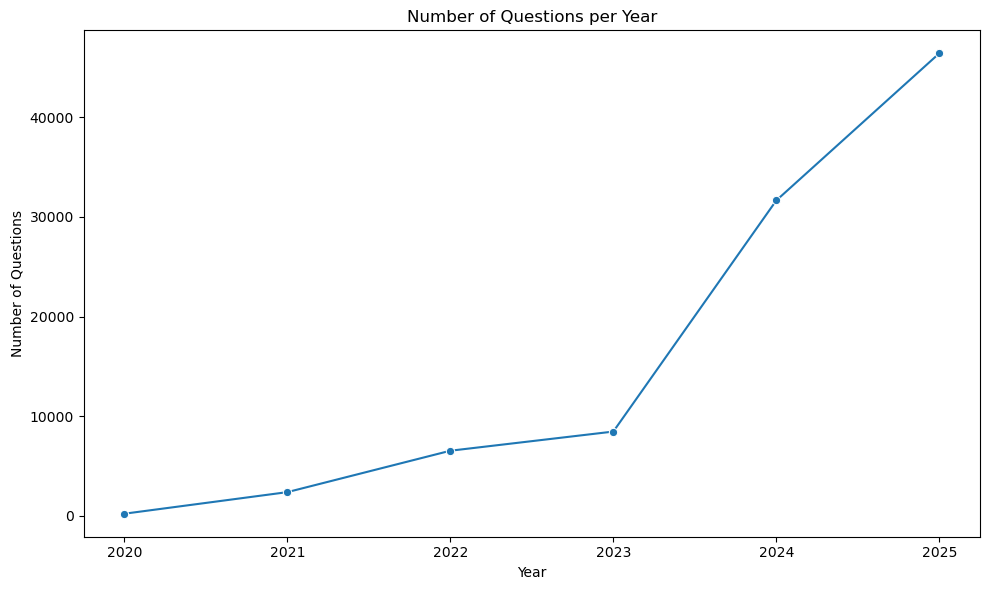

In [4]:
# 연도별 질문 개수 확인
year_counts = df['creation_year'].value_counts().sort_index()
print("====Yearly Question Counts====")
print(year_counts)

# 연도별 질문 개수 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Number of Questions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Questions')
plt.tight_layout()
plt.show()

In [ ]:
# tags 열의 고유 값 파싱 전 검사
import ast

bad_values = []

for v in df['tags'].unique():
    try:
        ast.literal_eval(v)
    except Exception as e:
        bad_values.append((v, repr(e)))

for v, err in bad_values:
    print(f"Bad value: {v} => Error: {err}")

Bad value: python, artificial-intelligence, huggingface, gradio => Error: ValueError('malformed node or string: <ast.Name object at 0x00000136DAD12160>')
Bad value: python, minio => Error: ValueError('malformed node or string: <ast.Name object at 0x00000136DBE4EB80>')
Bad value: python, matplotlib, tkinter => Error: ValueError('malformed node or string: <ast.Name object at 0x00000136DBE4E6D0>')
Bad value: python, zoho, zohocatalyst => Error: ValueError('malformed node or string: <ast.Name object at 0x00000136DBE4E1C0>')
Bad value: python, sympy => Error: ValueError('malformed node or string: <ast.Name object at 0x00000136DBE4E9D0>')
Bad value: python, google-gemini, reasoning, dspy => Error: ValueError('malformed node or string: <ast.Name object at 0x00000136DBE4E9A0>')
Bad value: python, telegram, aiogram, pyrogram => Error: ValueError('malformed node or string: <ast.Name object at 0x00000136DBE4E160>')
Bad value: python, ssh, automation, tty => Error: ValueError('malformed node or st

In [10]:
print(df[['question_id', 'title', 'programming_language', 'tags']].head())

   question_id                                              title  \
0     79810291  AttributeError: 'NoneType' object has no attri...   
1     79810195    contextlib tries to change a "frozen" exception   
2     79810063  Tkinter window shrinks after embedding Matplot...   
3     79810057  CatalystAppError: {'code': 'FATAL ERROR', 'mes...   
4     79810049  Sympy : Problem with simplifying a Sympy vecto...   

  programming_language                                               tags  
0               python  python, artificial-intelligence, huggingface, ...  
1               python                                      python, minio  
2               python                        python, matplotlib, tkinter  
3               python                         python, zoho, zohocatalyst  
4               python                                      python, sympy  


programming_language
javascript    7355
python        6491
java          5948
c++           5272
c#            5167
swift         5044
r             5014
c             4869
rust          4847
ruby          4846
sql           4822
php           4812
go            4811
kotlin        4543
scala         4526
matlab        4157
typescript    4072
perl          3854
html          3200
css           1781
Name: count, dtype: int64


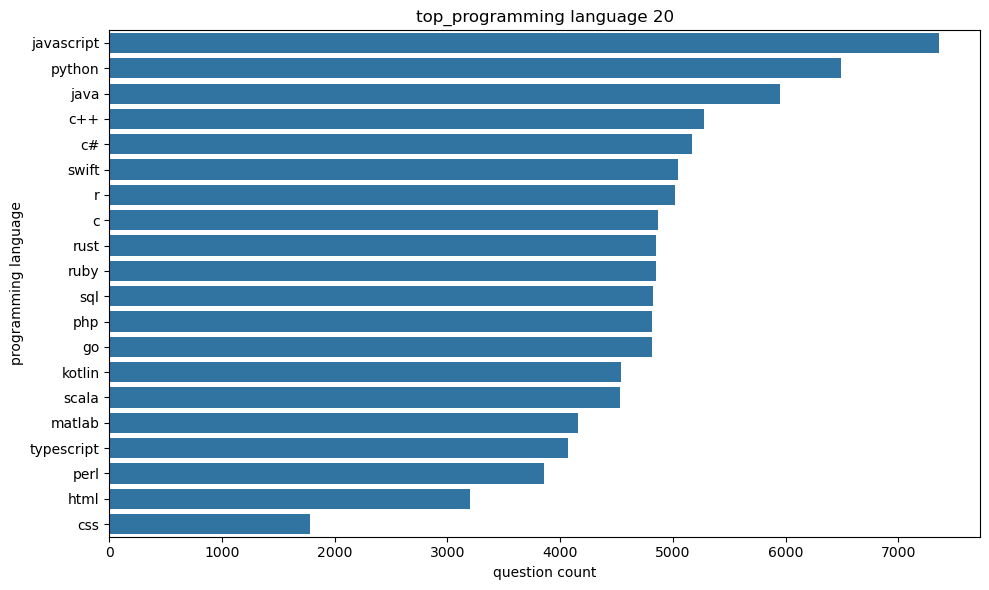

In [13]:
top_langs = df['programming_language'].value_counts().head(20)
print(top_langs)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_langs.values, y=top_langs.index)
plt.title("top_programming language 20")
plt.xlabel("question count")
plt.ylabel("programming language")
plt.tight_layout()
plt.show()